In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train_data = pd.read_csv('../files/titanic_train.csv')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

<AxesSubplot:>

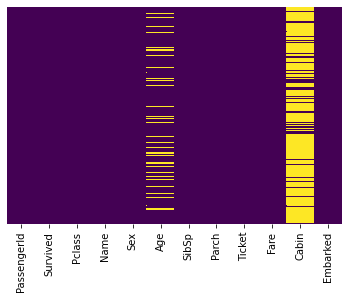

In [5]:
# Use this to explore ur data and check for missing values
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# All columns with no different color breaking means they have no null values and vice versa

In [6]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

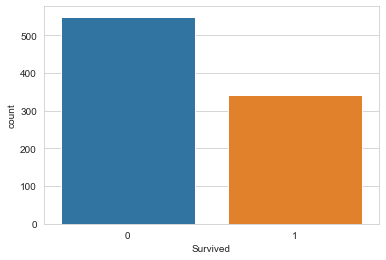

In [7]:
sns.countplot(x='Survived', data=train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

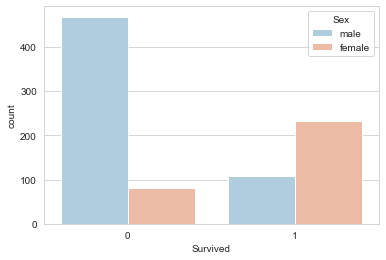

In [8]:
sns.countplot(x='Survived', data=train_data, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

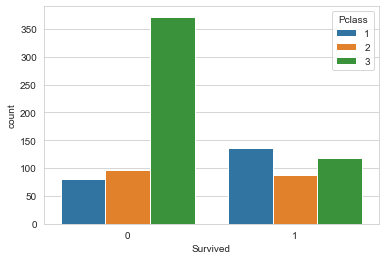

In [9]:
sns.countplot(x='Survived', data=train_data, hue='Pclass')

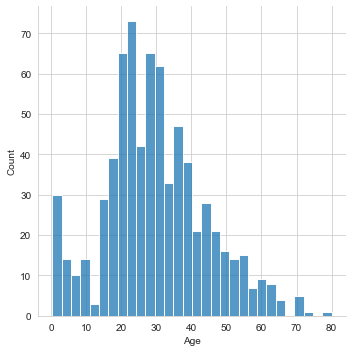

In [10]:
sns.displot(train_data['Age'].dropna(), kde=False, bins=30)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

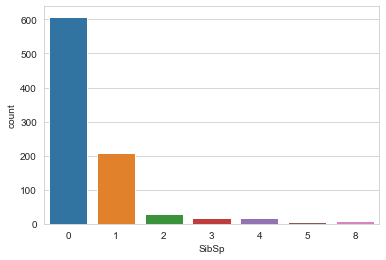

In [12]:
# SibSp means no of siblings/spouse on board
sns.countplot(x='SibSp', data =train_data)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

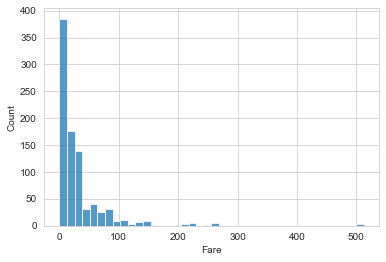

In [13]:
sns.histplot(x='Fare', data=train_data, bins=40)

Using cufflinks

In [14]:
import cufflinks as cf

In [15]:
cf.go_offline()

In [16]:
train_data['Fare'].iplot(kind='hist', bins=50)

### Cleaning the data

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

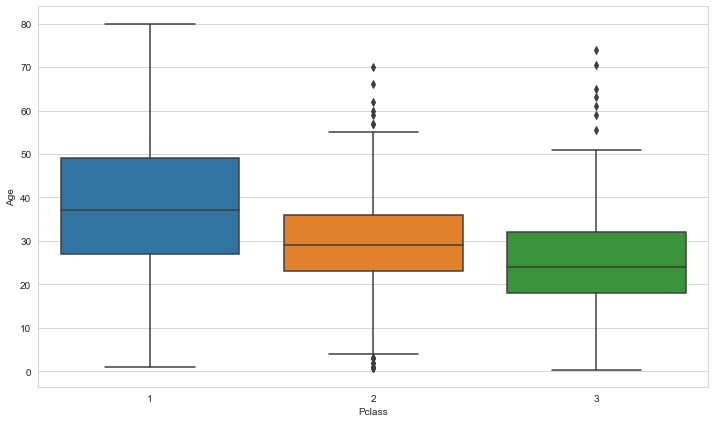

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train_data)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [18]:
# What the function below is doing is that it is filling the missing age with the average for the passenger class that person belongs to.
# The averages are gotten from the boxplot above.
def impute_age(cols):#My function accepts two columns(cols)
    Age = cols[0]#column at index 0
    Pclass = cols[1]#column at index 1
    
    if pd.isnull(Age): #If the Age column is null (pd.isnull is a pandas method)

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [19]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

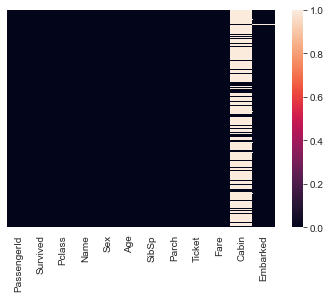

In [20]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [21]:
# Drop the cabin column since there are too much missing info
train_data.drop('Cabin',axis=1,inplace=True)

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# Since the embarked column has only one missing value, we can just drop that value. It won't have significant effect

train_data.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [24]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [25]:
# Drop the old columns Sex, Embarked which we don't need again and the Name, Tickets columns which our algorithm wouldn't need.
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
train_data = pd.concat([train_data,sex,embark],axis=1)

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
train_data.drop('PassengerId', axis=1, inplace=True)
# Since the passengerid column is just a serial number column, it holds no significant predictive power so we drop it too



# Building a Logistic Regression model

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=train_data.drop('Survived', axis=1)
y= train_data['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.7750,0,0,1
651,2,18.0,0,1,23.0000,0,0,1
2,3,26.0,0,0,7.9250,0,0,1
690,1,31.0,1,0,57.0000,1,0,1
196,3,24.0,0,0,7.7500,1,1,0
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,0,0,1
840,3,20.0,0,0,7.9250,1,0,1
338,3,45.0,0,0,8.0500,1,0,1
524,3,24.0,0,0,7.2292,1,0,0


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression(max_iter=1000)
# The default number of iterations is 100 so to avoid getting a warning if my algorithm has to perform iterations more than that, I can set it to a number fromm 1000 above

In [35]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

## Evaluation


In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)

## Testing my model with an entirely new data

In [43]:
new_data = pd.read_csv('../files/titanic_test.csv')

In [46]:
new_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [45]:
new_data['Age'] = new_data[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

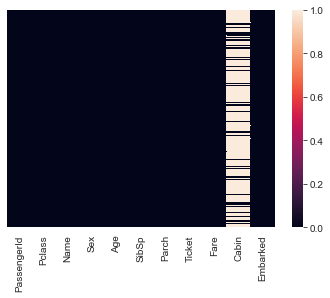

In [47]:
sns.heatmap(new_data.isnull(), yticklabels=False, cbar='viridis')

In [48]:
# Drop the cabin column since there are too much missing info
new_data.drop('Cabin',axis=1,inplace=True)

In [50]:
# Since the embarked column has only one missing value, we can just drop that value. It won't have significant effect

new_data.dropna(inplace=True)

In [51]:
sex = pd.get_dummies(new_data['Sex'],drop_first=True)
embark = pd.get_dummies(new_data['Embarked'],drop_first=True)

In [52]:
# Drop the old columns Sex, Embarked which we don't need again and the Name, Tickets columns which our algorithm wouldn't need.
new_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [53]:
new_data = pd.concat([new_data,sex,embark],axis=1)

In [55]:
new_data.drop('PassengerId', axis=1, inplace=True)
# Since the passengerid column is just a serial number column, it holds no significant predictive power so we drop it too

In [56]:
predictions = logmodel.predict(new_data)

In [57]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,